# Predictive Modeling
## Boston Housing Dataset (1970)

In [105]:
#Details about the Dataset

# Each record in the database describes a Boston suburb or town. 
# The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 
# The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town


# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

### Importing Libraries

In [106]:
import numpy as np
import pandas as pd

import os

In [107]:
# Reading the Dataset File
from pandas import read_csv
#column_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
column_name = ['Crimes', 'DHA', 'Blue_Area', 'River', 'NOX', 'Rooms', 'Old_Build', 'D_Center', 'D_Highway', 'Tax', 'Teac-Stu', 'Black', 'Poor', 'MEDV']

data = read_csv('housing.csv', header=None , delimiter=r"\s+", names=column_name)
print(data)

      Crimes   DHA  Blue_Area  River    NOX  Rooms  Old_Build  D_Center   
0    0.00632  18.0       2.31      0  0.538  6.575       65.2    4.0900  \
1    0.02731   0.0       7.07      0  0.469  6.421       78.9    4.9671   
2    0.02729   0.0       7.07      0  0.469  7.185       61.1    4.9671   
3    0.03237   0.0       2.18      0  0.458  6.998       45.8    6.0622   
4    0.06905   0.0       2.18      0  0.458  7.147       54.2    6.0622   
..       ...   ...        ...    ...    ...    ...        ...       ...   
501  0.06263   0.0      11.93      0  0.573  6.593       69.1    2.4786   
502  0.04527   0.0      11.93      0  0.573  6.120       76.7    2.2875   
503  0.06076   0.0      11.93      0  0.573  6.976       91.0    2.1675   
504  0.10959   0.0      11.93      0  0.573  6.794       89.3    2.3889   
505  0.04741   0.0      11.93      0  0.573  6.030       80.8    2.5050   

     D_Highway    Tax  Teac-Stu   Black  Poor  MEDV  
0            1  296.0      15.3  396.90  4.98

In [108]:
# Personal Assessment - Each row in the Boston Housing Dataset corresponds to a specific neighborhood or area in Boston, not necessarily an individual building. Each neighborhood is described by a set of features or attributes, such as crime rate, residential land proportion, average number of rooms, and more. These features collectively provide information about the characteristics of the neighborhood. 
print('Dimensions of the Dataset are:', np.shape(data))

print(data.describe())

Dimensions of the Dataset are: (506, 14)
           Crimes         DHA   Blue_Area       River         NOX       Rooms   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

        Old_Build    D_Center   D_Highway         Tax    Teac-Stu       Black   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.574901    3.795043    9.549407  408.237154   18.455534  

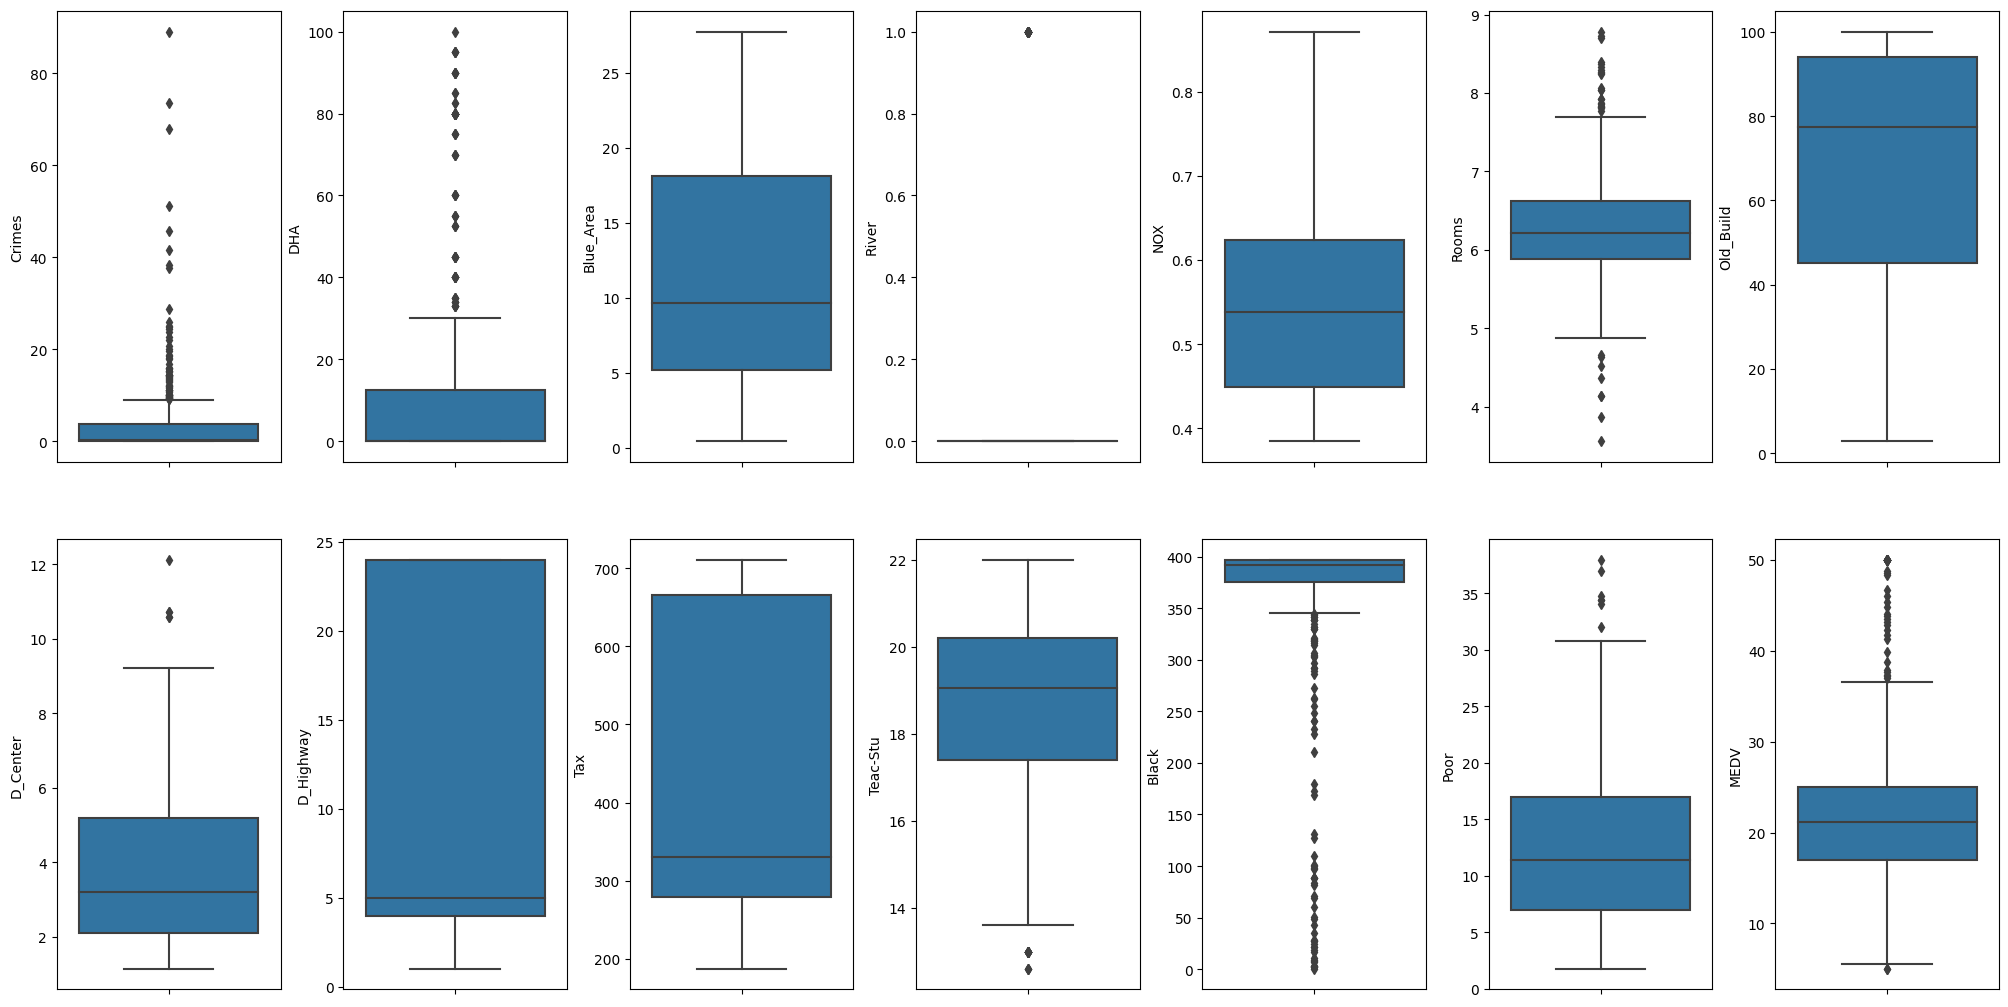

In [109]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7 , nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in data.items():
    sns.boxplot(y=k, data=data, ax = axs[index])
    index +=1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [110]:
# Analyzing Outlier Percentage
for k,v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1

    x = q1 - (1.5*iqr)
    y = q3 + (1.5*iqr)

    v_col = v[(v <= x) | (v >= y)] #Determining the Outliers
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Data from %s Outliers = %.2f%%" % (k,perc))

Data from Crimes Outliers = 13.04%
Data from DHA Outliers = 13.44%
Data from Blue_Area Outliers = 0.00%
Data from River Outliers = 100.00%
Data from NOX Outliers = 0.00%
Data from Rooms Outliers = 5.93%
Data from Old_Build Outliers = 0.00%
Data from D_Center Outliers = 0.99%
Data from D_Highway Outliers = 0.00%
Data from Tax Outliers = 0.00%
Data from Teac-Stu Outliers = 2.96%
Data from Black Outliers = 15.22%
Data from Poor Outliers = 1.38%
Data from MEDV Outliers = 7.91%


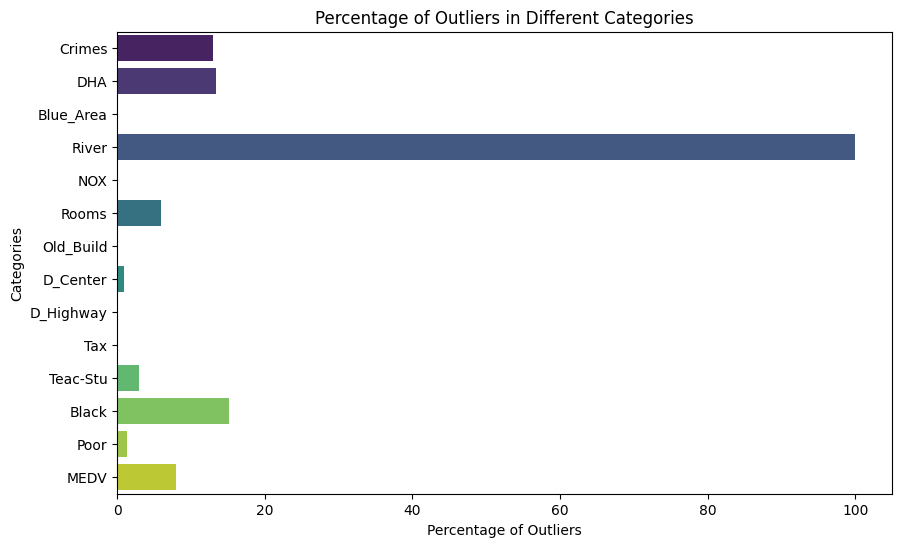

In [111]:
outlier_percentages = [13.04, 13.44, 0.00, 100.00, 0.00, 5.93, 0.00, 0.99, 0.00, 0.00, 2.96, 15.22, 1.38, 7.91]

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=outlier_percentages, y=column_name, palette="viridis")

# Adding labels and title
plt.xlabel("Percentage of Outliers")
plt.ylabel("Categories")
plt.title("Percentage of Outliers in Different Categories")

# Display the plot
plt.show()


In [112]:
# Remove MEDV outliers (MEDV = 50.0)
data = data[~(data['MEDV']>= 50.0)]
print(np.shape(data))

(490, 14)


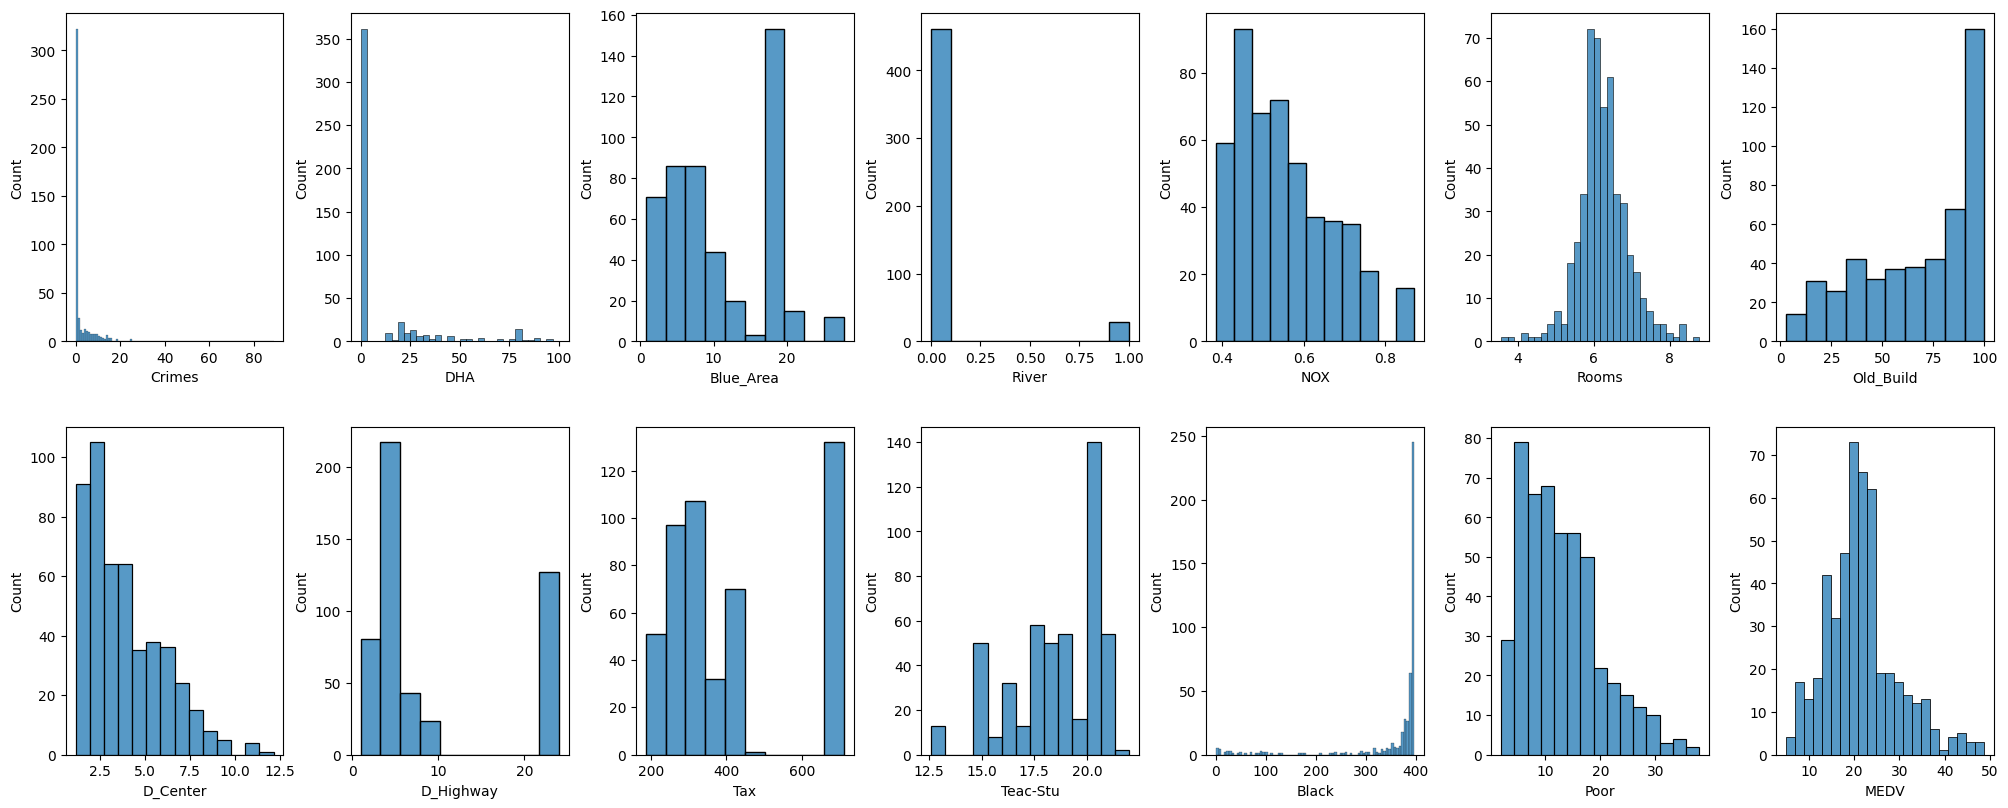

In [113]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 8))
index = 0
axs = axs.flatten()

for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index +=1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)


In [114]:
# The histogram also shows that columns Crimes, DHA, Blacks has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except River (which is a discrete variable).

# Now let's plot the pairwise correlation on data.

<Axes: >

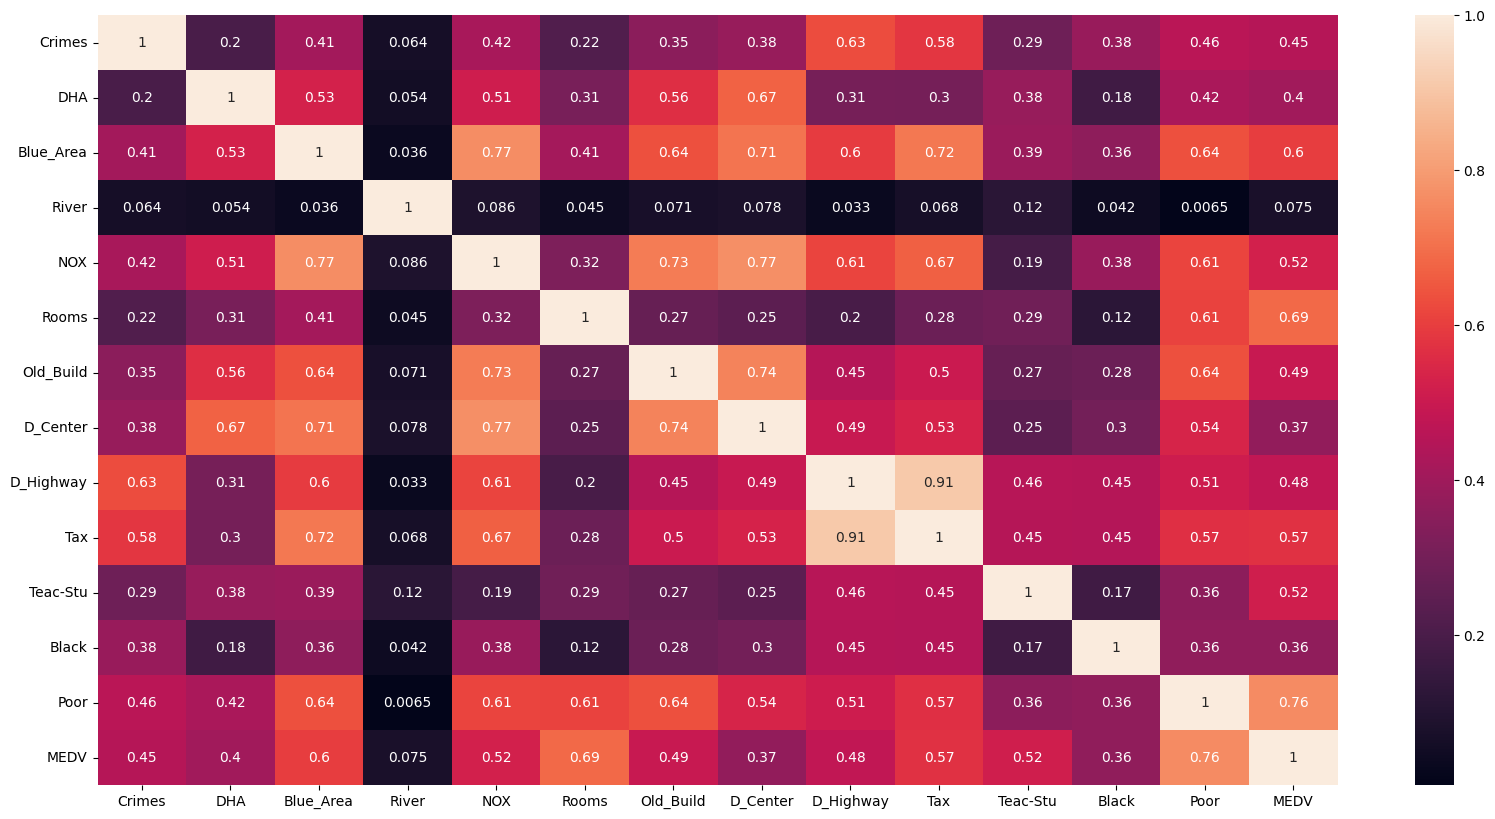

In [115]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True)

In [116]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


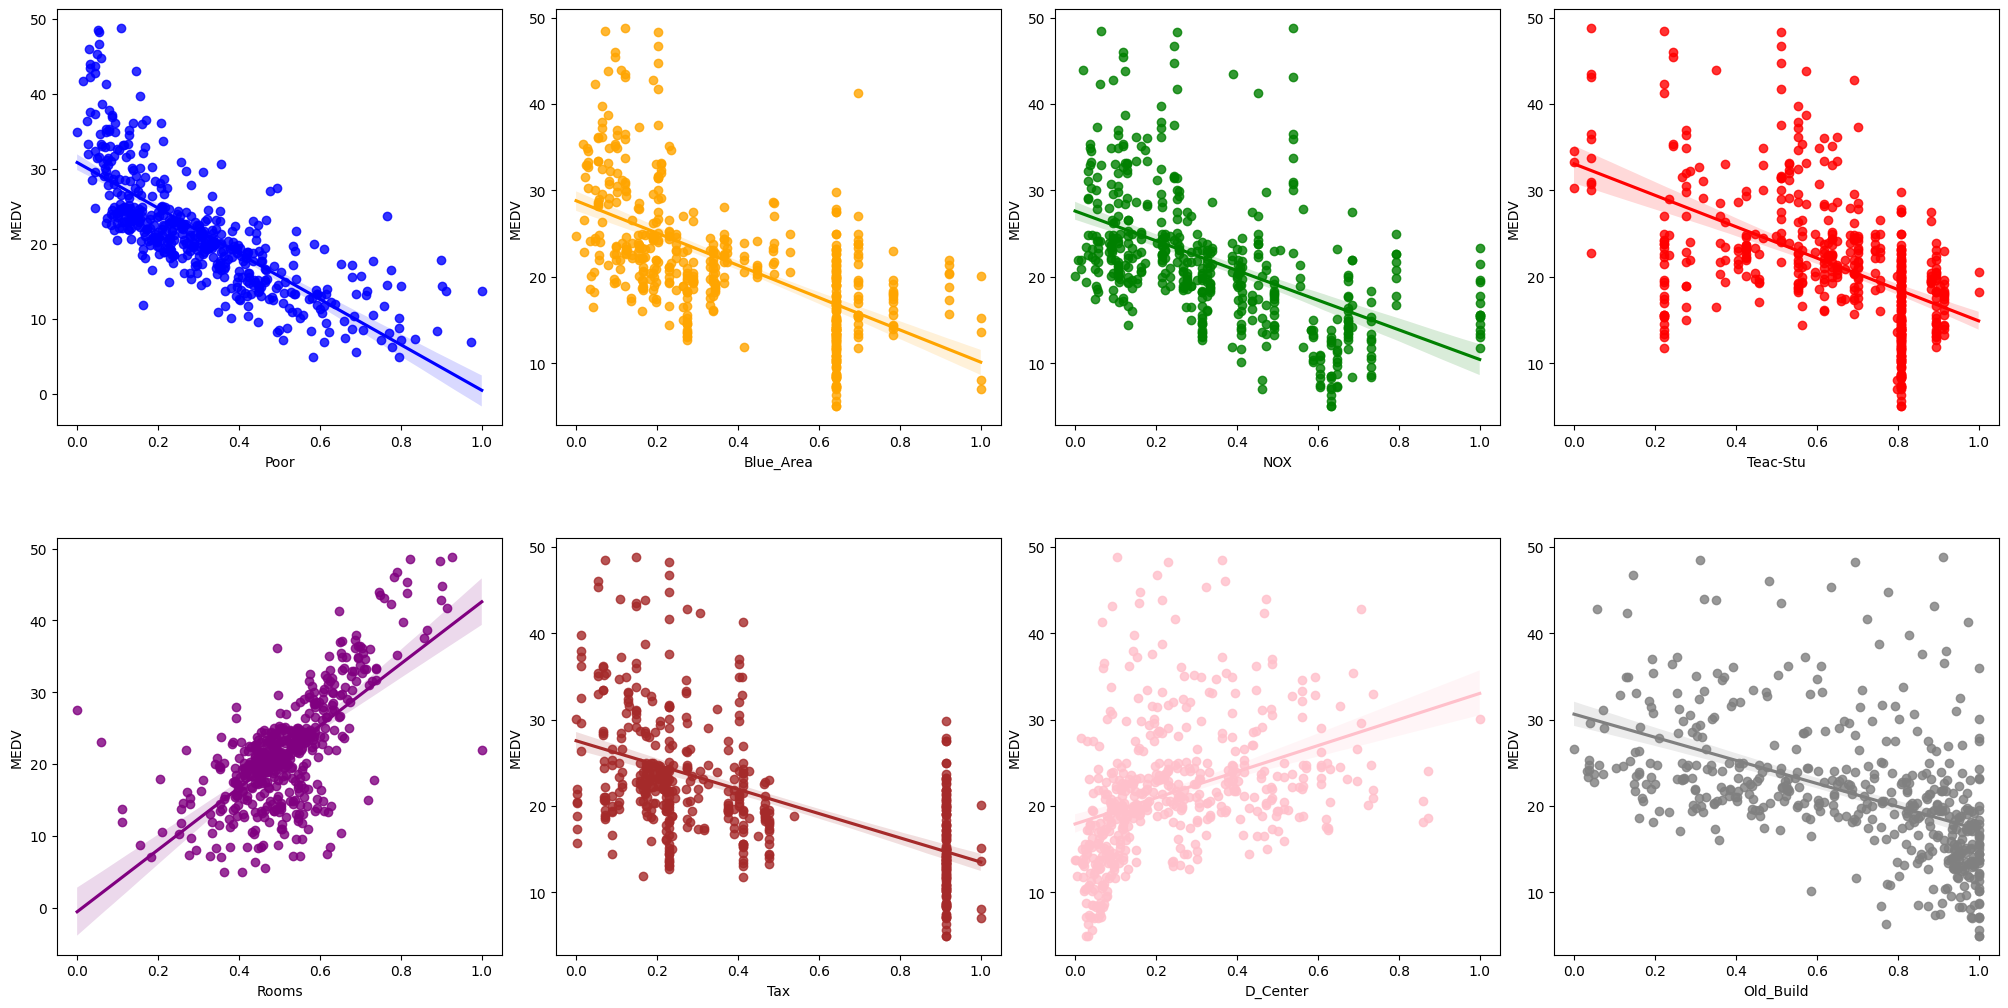

In [117]:
from sklearn import preprocessing

#Scaling the Columns
min_max_scaler = preprocessing.MinMaxScaler()
column_sets = ['Poor', 'Blue_Area', 'NOX', 'Teac-Stu','Rooms', 'Tax', 'D_Center', 'Old_Build']
x = data.loc[:,column_sets]
y = data['MEDV']

#x = pd.DataFrame(data, columns=column_sets)
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sets)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']


fig, axs = plt.subplots(ncols=4 , nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for i,k in enumerate(column_sets):
    sns.regplot(y=y, x=x[k], ax=axs[i], color=colors[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [118]:
# Removing Skewedness of Data using Trough Log Transformation
y = np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew())>0.3:
        x[col] = np.log1p(x[col])

In [119]:
# Using Linear Regression - - - - -
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_reg = linear_model.LinearRegression()
kf = KFold(n_splits = 15) 
# The command is setting up a configuration for k-fold cross-validation with 10 folds. This is commonly used in machine learning to assess the performance and generalization ability of a model by training and testing it on different subsets of the dataset.
# Means the dataset will be split into 10 folds for cross-validation. The model will be trained and evaluated 10 times, with each of the 10 folds used as the test set exactly once

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# x_scaled Contains the 8 Independent Variables while Y is the MedV and the Dependant Variable.
scores = cross_val_score(l_reg, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#print(scores)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


##### Linear Regression - Ridge #####

scores_map = {}
scores_map['LinearRegression'] = scores

l_rig = linear_model.Ridge()
scores = cross_val_score(l_rig, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE:", scores.mean(), "(+/-", scores.std(), ")")

#print((scores_map))


##### Polynomial Regression with L2 with Degree For Improvements #####
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree=1), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#scores_map['PolyRidge'] = scores
print("MSE:", scores.mean(), "(+/-", scores.std(), ")")

model = make_pipeline(PolynomialFeatures(degree=6), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#scores_map['PolyRidge'] = scores
print("MSE:", scores.mean(), "(+/-", scores.std(), ")")

model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#scores_map['PolyRidge'] = scores
print("MSE:", scores.mean(), "(+/-", scores.std(), ")")

model = make_pipeline(PolynomialFeatures(degree=4), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#scores_map['PolyRidge'] = scores
print("MSE:", scores.mean(), "(+/-", scores.std(), ")")

# The Liner Regression with and without L2 regularization does not make significant difference is MSE score. 
# However polynomial regression with degree=3 has a better MSE.

MSE: -0.04 (+/- 0.04)
MSE: -0.038364404093869105 (+/- 0.03699600070397837 )
MSE: -0.03836440409386909 (+/- 0.03699600070397835 )
MSE: -0.030587327661863735 (+/- 0.02652400455899743 )
MSE: -0.03243039410679698 (+/- 0.03116658087808215 )
MSE: -0.03211941162276414 (+/- 0.030113132026196587 )


In [120]:
# Let's try some non prametric regression techniques: 
# 01. SVR with kernal RBF, 
# 02. Decision Tree Regressor, 
# 03. K-Neighbors Regressor etc.

In [122]:
#### Implementing Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=1)
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma":np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')

grid_sv.fit(x_scaled, y)
print("Best Classifier :", grid_sv.best_estimator_)

scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores

print("MSE:", scores.mean(), "(+/-", scores.std(), ")")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best Classifier : SVR(gamma=1.0)
MSE: -0.0901183531726947 (+/- 0.09139639061982364 )
MSE: -0.09 (+/- 0.09)


In [123]:
### Implementing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTree'] = scores

print("MSE:", scores.mean(), "(+/-", scores.std(), ")")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.0445760569520347 (+/- 0.0519143919988965 )
MSE: -0.04 (+/- 0.05)


In [129]:
### Implementing KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)

scores = cross_val_score(knn, x_scaled, y, scoring='neg_mean_squared_error', cv=kf)
scores_map['KNeighborsRegressor'] = scores

grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)

print("MSE:", scores.mean(), "(+/-", scores.std(), ")")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : KNeighborsRegressor(n_neighbors=7)
MSE: -0.03752433916652416 (+/- 0.024230402185189456 )
MSE: -0.04 (+/- 0.02)


In [133]:
### Implementing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9, learning_rate=5e-2, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)

scores = cross_val_score(gbr, x_scaled, y, scoring='neg_mean_squared_error', cv=kf)
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)


<Axes: >

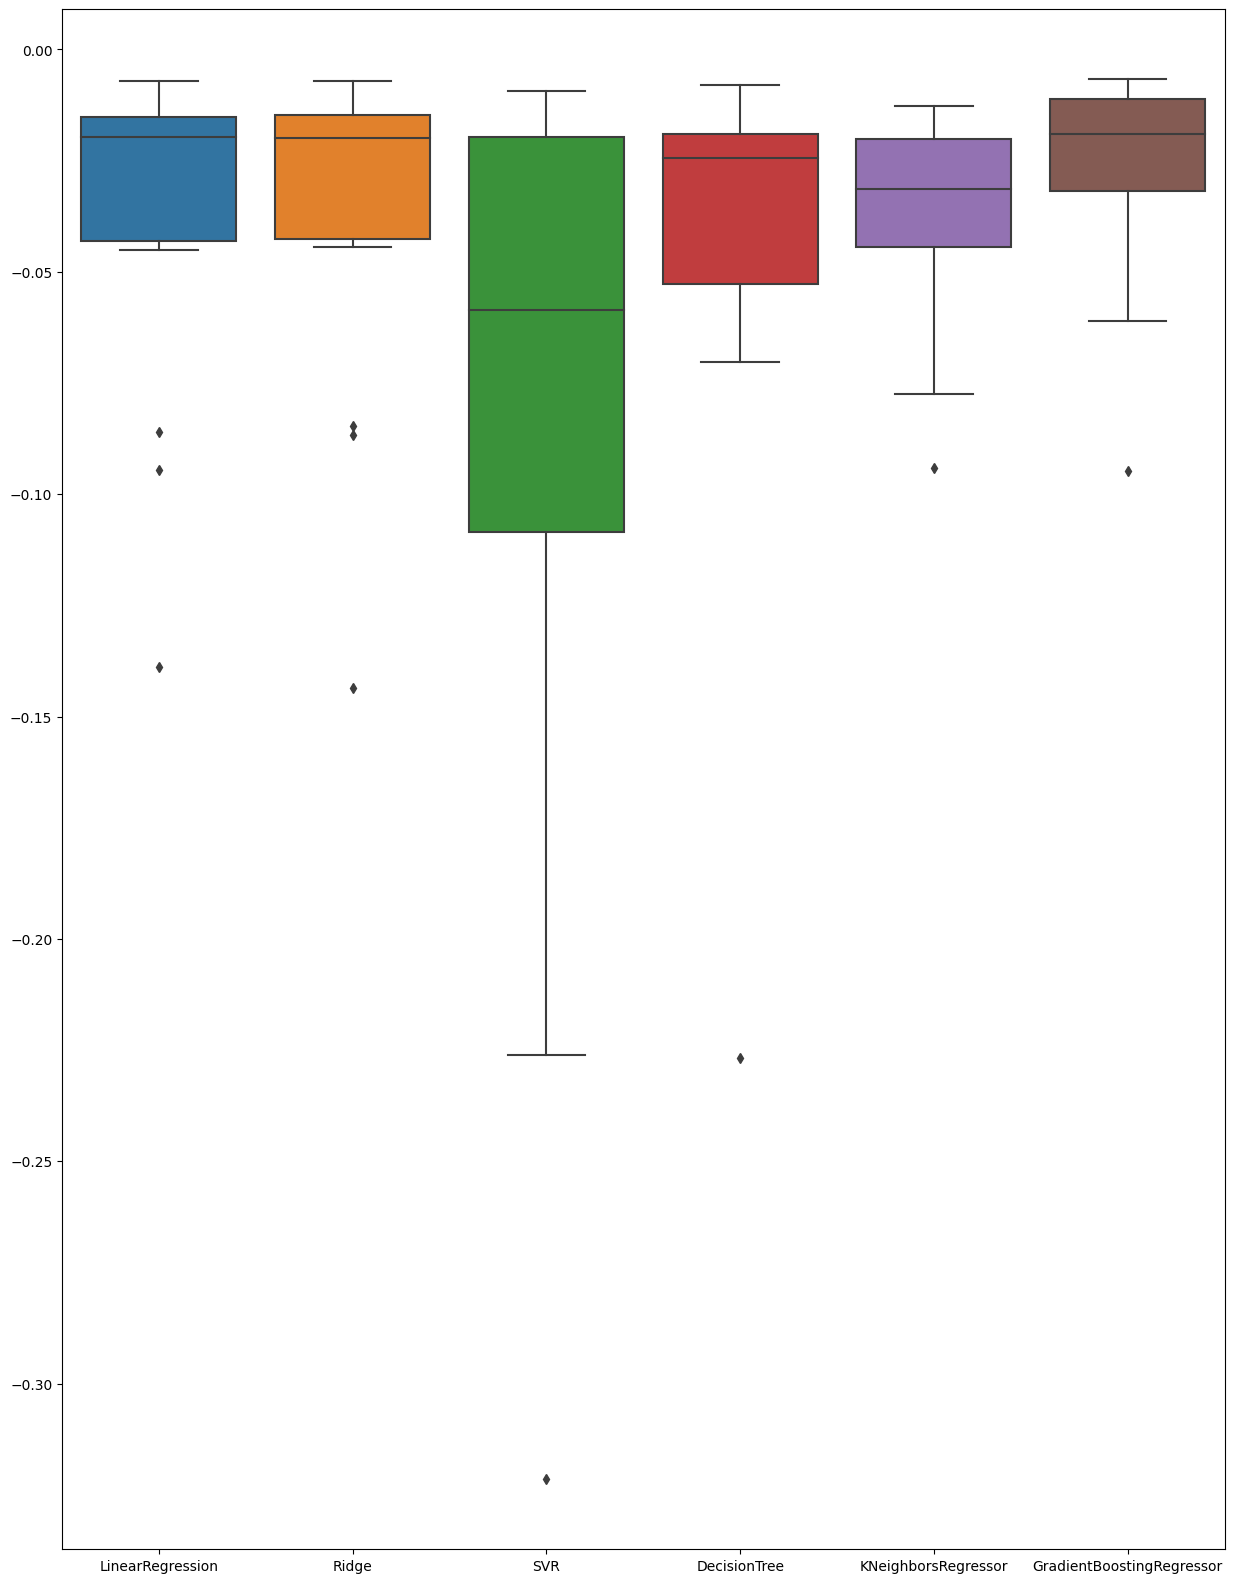

In [151]:
# Comparing All Models Results
plt.figure(figsize=(15,20))
scores_map_1 = pd.DataFrame(scores_map)
#print(scores_map_1)
sns.boxplot(data=scores_map_1)

In [152]:
### Hence Gradient Boosting Regressor is Performing the Best with Minimal Error